Загрузим данные с диска

In [ ]:
!gdown 1R7tU1I45gpVRiYB3XT8vcPsoOifyrt2P

Downloading...
From: https://drive.google.com/uc?id=1R7tU1I45gpVRiYB3XT8vcPsoOifyrt2P
To: /content/МФТИ.zip
100% 118k/118k [00:00<00:00, 90.6MB/s]


Разархивируем

In [ ]:
!unzip /content/МФТИ.zip

Archive:  /content/МФТИ.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


Выгрузим необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Считаем тренировочные и тестовые данные

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Посмотрим есть ли пропущенные значения

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Посмотрим есть ли дупликаты

In [ ]:
train_df.duplicated().sum()

14

удалим дупликаты

In [ ]:
train_df = train_df.drop_duplicates()

Разделим для удобства признаки на категориальные и числовые

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]



In [ ]:
len(cat_cols)

16

Заменим категориальные признаки на числа с помощью LabelEncoder

In [ ]:
le = preprocessing.LabelEncoder()
for cat_col in train_df[cat_cols]:
    train_df[cat_col] = le.fit_transform(train_df[cat_col])
train_df[cat_cols].head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3
1,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1
2,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2
3,0,1,1,0,1,2,1,0,0,2,0,0,0,0,0,3
4,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1


Посмотрим соотношение классов

In [ ]:
feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
train_df[target_col].value_counts()

0    3894
1    1374
Name: Churn, dtype: int64

классы несбалансированны - в качестве метрики используем ROC-AUC
Построим гистограмму для наглядности

(array([3894.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1374.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

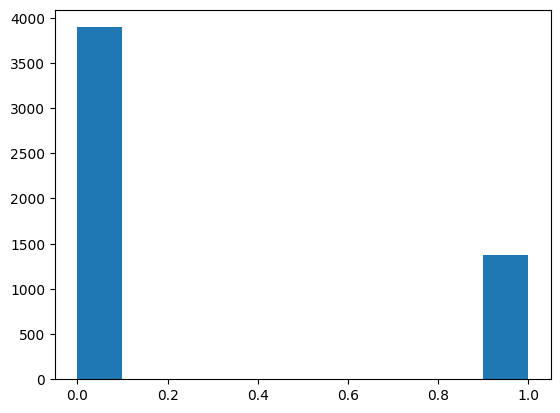

In [ ]:
plt.hist(train_df[target_col])

Посмотрим как целевая переменная зависит от категориальных переменных

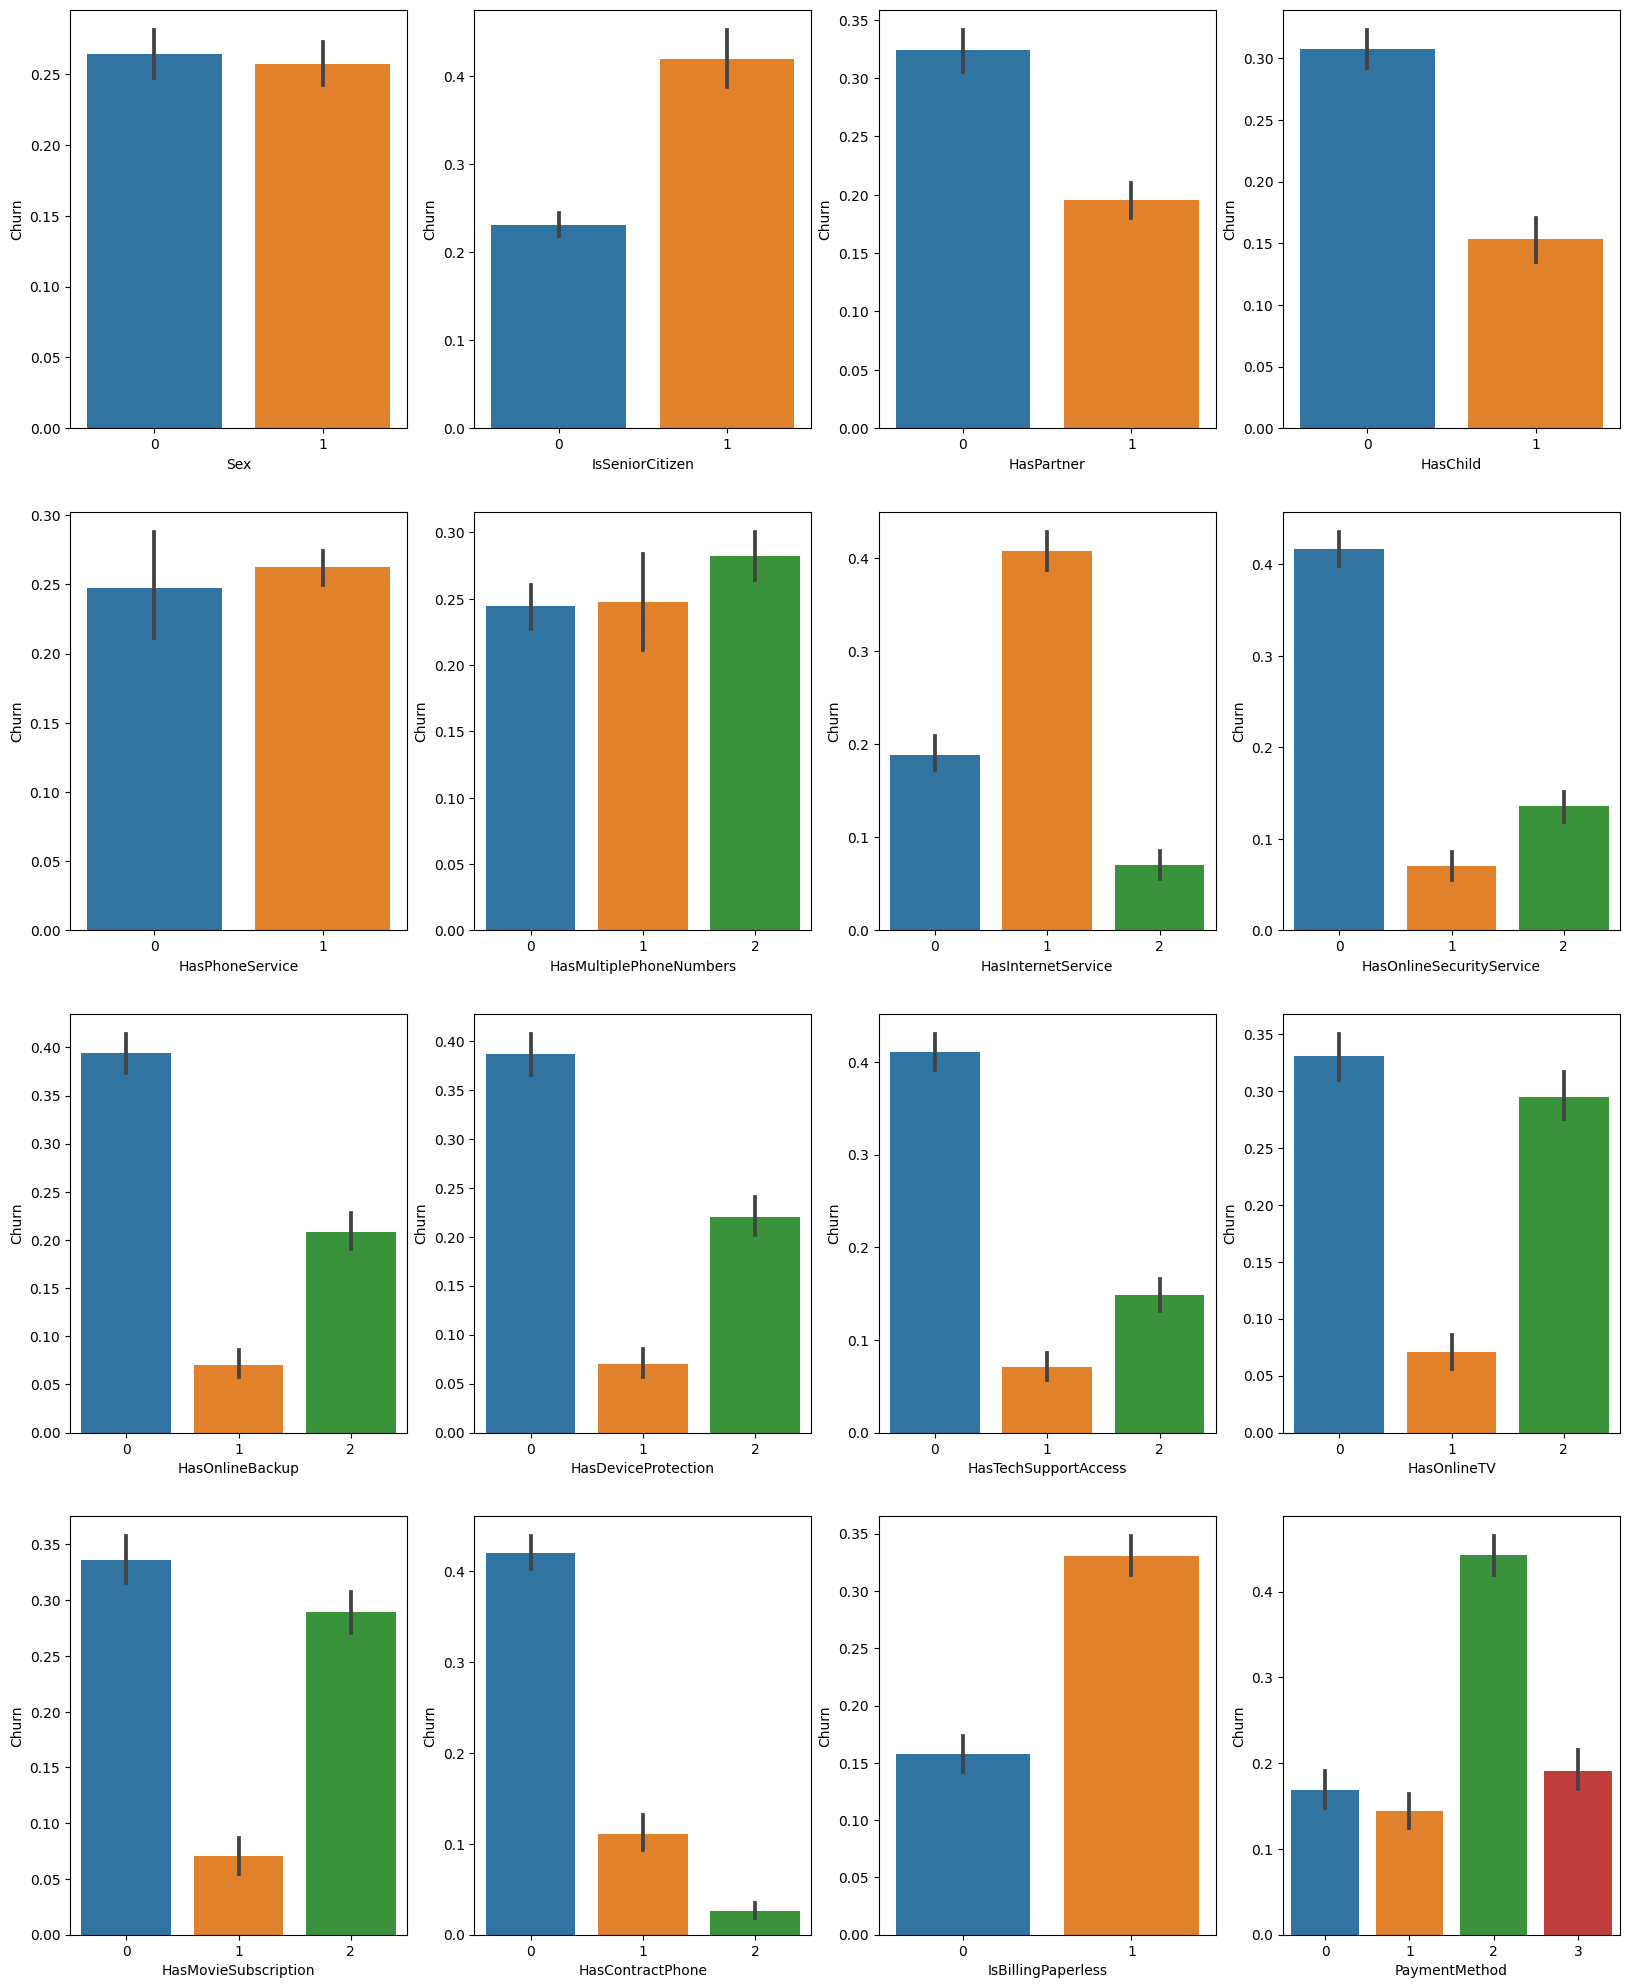

In [ ]:
rcParams['figure.figsize'] = 20, 25
for index,col in enumerate(cat_cols):
    plt.subplot(4, 4, index + 1)
    sns.barplot(x=col, y='Churn', data=train_df)
plt.show()

Видно, что некоторые переменные слабо влияют на целевой показатель, например, пол или HasPhoneService

<ipython-input-16-ace5c128e7b2>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df[feature_cols].corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,


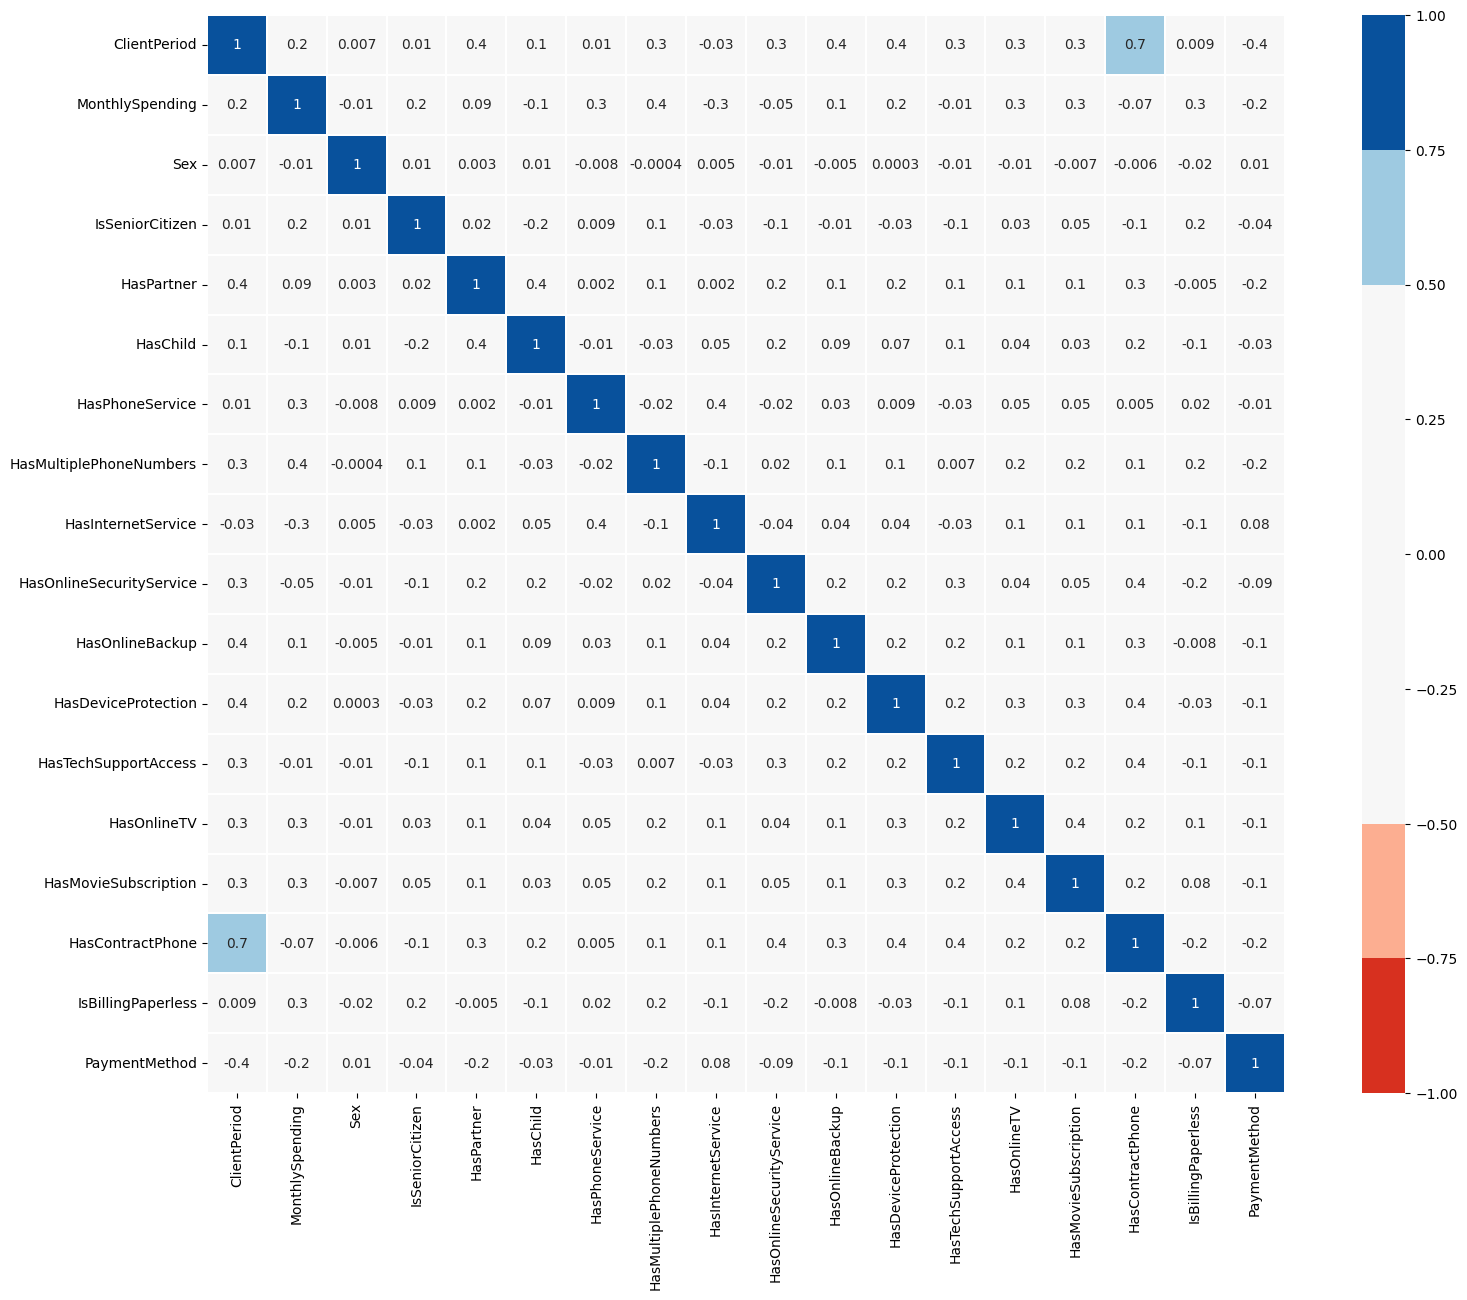

In [ ]:
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])

# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    train_df[feature_cols].corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g',
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

Сильной корреляции между признаками не выявлено. Есть небольшая корреляция между HasContactPhone и ClientPeriod

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

Разделим выборку на X и y

In [ ]:
X = train_df[feature_cols]
y = train_df[target_col]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3
1,72,25.85,1872.2,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1
2,1,75.90,75.9,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2
3,32,79.30,2570,0,1,1,0,1,2,1,0,0,2,0,0,0,0,0,3
4,60,115.25,6758.45,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1


Столбец 'TotalSpent' содержит пустые строки

In [ ]:
np.where(X.applymap(lambda x: x == ' '))

(array([1048, 1704, 2538, 3070, 3688, 3992, 4315, 4538, 4585]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2]))

есть пустые строки, В "TotalSpent" 9 объектов с пробелами вместо значений
Заполним их нулями



In [ ]:
X['TotalSpent'] = X['TotalSpent'].replace(' ', 0)

Нормализуем данные

In [ ]:
scl = StandardScaler()
X = scl.fit_transform(X)

Разделим данные на тренировочную и валидационную выборку

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

Посмотрим как работают различные модели

In [ ]:
clf_1 = LogisticRegression()
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_val)
print(roc_auc_score(y_val, y_pred))

0.7390267242385342


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf_2 = GaussianNB()
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_val)
print(roc_auc_score(y_val, y_pred))

0.7421122651417901


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf_3 = LinearSVC()
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_val)
print(roc_auc_score(y_val, y_pred))

0.7276905123118217


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)
y_pred = clf_4.predict(X_val)
print(roc_auc_score(y_val, y_pred))

0.6987069669739759


Подберем параметры для RandomForestClassifier
Сначала грубая оценка оптимальных параметров С помощью RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


n_estimators = list(range(100, 500, 5))
max_features = ['auto', 'sqrt']

max_depth = list(range(10, 100, 10))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator=clf_4, param_distributions=random_grid,
                              n_iter = 50, scoring='roc_auc',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_



Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 435,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

 С помощью GridSearchCV более точно подберем параметры

In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 9, 10],
    'n_estimators': [350, 400, 450, 500, 550]
}


grid_search_rf = GridSearchCV(estimator = clf_4, param_grid = params,
                           scoring = 'roc_auc', cv = 3,
                           n_jobs = -1, verbose = 2)

grid_search_rf.fit(X_train, y_train)
y_pred = grid_search_rf.best_estimator_.predict(X_val)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [ ]:
print(roc_auc_score(y_val, y_pred))

0.7191364219862294


Рандомный лес отработал хуже, чем баесовский алгоритм

#Применение градиентного бустинга (2 балла)
Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
cb = CatBoostClassifier(iterations = 100, depth = 4, learning_rate = 0.1,  custom_loss = 'AUC',
random_state = 42)

In [ ]:
cb.fit(X_train, y_train, eval_set=(X_val, y_val))

0:	learn: 0.6560176	test: 0.6573930	best: 0.6573930 (0)	total: 47.6ms	remaining: 4.72s
1:	learn: 0.6249694	test: 0.6267375	best: 0.6267375 (1)	total: 49.7ms	remaining: 2.43s
2:	learn: 0.5971266	test: 0.5978474	best: 0.5978474 (2)	total: 51.1ms	remaining: 1.65s
3:	learn: 0.5731815	test: 0.5740524	best: 0.5740524 (3)	total: 52.5ms	remaining: 1.26s
4:	learn: 0.5544654	test: 0.5561950	best: 0.5561950 (4)	total: 53.9ms	remaining: 1.02s
5:	learn: 0.5373080	test: 0.5397639	best: 0.5397639 (5)	total: 55.4ms	remaining: 869ms
6:	learn: 0.5223167	test: 0.5240067	best: 0.5240067 (6)	total: 56.9ms	remaining: 756ms
7:	learn: 0.5105565	test: 0.5133374	best: 0.5133374 (7)	total: 58.5ms	remaining: 672ms
8:	learn: 0.4995189	test: 0.5031212	best: 0.5031212 (8)	total: 59.9ms	remaining: 606ms
9:	learn: 0.4909265	test: 0.4954118	best: 0.4954118 (9)	total: 61.1ms	remaining: 550ms
10:	learn: 0.4829184	test: 0.4880094	best: 0.4880094 (10)	total: 62.4ms	remaining: 505ms
11:	learn: 0.4753657	test: 0.4793454	best

In [ ]:
y_pred = cb.predict_proba(X_val)

In [ ]:
roc_auc = roc_auc_score(y_val, y_pred[:, 1])
roc_auc

0.845858326525849

Градиентный бустинг показал лучшие результаты. Будем его использовать для финальных предсказаний

#Предсказания

Обучимся на всех данных

In [ ]:
cb.fit(X, y)

0:	learn: 0.6552014	total: 1.98ms	remaining: 196ms
1:	learn: 0.6240163	total: 3.54ms	remaining: 174ms
2:	learn: 0.5958409	total: 5.06ms	remaining: 164ms
3:	learn: 0.5723066	total: 6.49ms	remaining: 156ms
4:	learn: 0.5522442	total: 7.59ms	remaining: 144ms
5:	learn: 0.5354483	total: 9.14ms	remaining: 143ms
6:	learn: 0.5204389	total: 10.7ms	remaining: 142ms
7:	learn: 0.5087301	total: 12.2ms	remaining: 140ms
8:	learn: 0.4984990	total: 13.5ms	remaining: 136ms
9:	learn: 0.4894576	total: 15ms	remaining: 135ms
10:	learn: 0.4815094	total: 16.6ms	remaining: 134ms
11:	learn: 0.4741321	total: 18.1ms	remaining: 133ms
12:	learn: 0.4676484	total: 19.4ms	remaining: 130ms
13:	learn: 0.4609437	total: 20.8ms	remaining: 128ms
14:	learn: 0.4556532	total: 22.3ms	remaining: 126ms
15:	learn: 0.4506808	total: 23.7ms	remaining: 124ms
16:	learn: 0.4468098	total: 25.1ms	remaining: 123ms
17:	learn: 0.4431482	total: 26.6ms	remaining: 121ms
18:	learn: 0.4395195	total: 28.1ms	remaining: 120ms
19:	learn: 0.4363959	tot

In [ ]:
X_test = pd.read_csv('/content/test.csv')

In [ ]:
X_test['TotalSpent'] = X_test['TotalSpent'].replace(' ', 0)

In [ ]:
for cat_col in X_test[cat_cols]:
    X_test[cat_col] = le.fit_transform(X_test[cat_col])

In [ ]:
X_test = scl.fit_transform(X_test)

In [ ]:
submission = pd.read_csv('/content/submission.csv',  index_col = 'Id')
submission['Churn'] = cb.predict(X_test)
submission.to_csv('./my_submission.csv')


In [ ]:
submission.head()

,Churn
Id,
0,0
1,1
2,1
3,0
4,0
